# Analysis of Police Incidents at City Level 

### Description: 

Incidents to evaluate: LARCENY/THEFT, ASSAULT, BURGLARY, 

* Are the particular trends of police incidents at city level?
* Have the incidents increased or decreased by year?  

* 1) Total number of incidents by year.

* 2) Percentage of incidents by categoy in a specific period of time ( by year )? 

* 3) Which are the top 10 crimes?


### Dependencies

In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

Loading a 2.2 million row file into python can take awhile, even on modern computers with a SSD. Using zipfile library, which grants access to a read_csv() function, does the loading as nearly 10x the speed of the base read.csv() Python function.

### Read main_data.zip dataset

In [25]:
data_zip_path = 'data/main-data.zip'
zf = zipfile.ZipFile(data_zip_path) # having Police_Incidents.csv zipped file.
data = pd.read_csv(zf.open('main-data.csv'))


In [34]:
zipcodes = [94110, 94109, 94123, 94118, 94124, 94108, 94103, 94114, 94102,
            94122, 94133, 94131, 94107, 94115, 94112, 94134, 94116, 94121,
            94111, 94117, 94132, 94105, 94127, 94158]

subset_zip=data[data.zipcode.isin(zipcodes)]

categories = ['LARCENY/THEFT', 'ASSAULT', 'VANDALISM', 'WARRANTS', 'VEHICLE THEFT', 
              'SUSPICIOUS OCC', 'BURGLARY', 'DRUG/NARCOTIC', 'ROBBERY', 'FRAUD']

subset_df=subset_zip[subset_zip.category.isin(categories)]

data_filter_df = subset_df.filter(['year', 'category', 'meta_cat', 'zipcode'], axis=1)
group_cat_y = data_filter_df.groupby(['year', 'zipcode'])
group_cat_y.size().unstack()

zipcode,94102,94103,94105,94107,94108,94109,94110,94111,94112,94114,...,94121,94122,94123,94124,94127,94131,94132,94133,94134,94158
year,,,,,,,,,,,,,,,,,,,,,
2010,10264,13723,1845,4039,1860,6264,7379,1131,4094,2908,...,1341,2163,1732,4939,653,1224,1560,2459,2554,196
2011,9969,12741,1921,3659,2027,5897,7294,1175,3674,3006,...,1430,2434,1784,5050,715,1262,1684,2659,2458,128
2012,10204,13692,1837,4707,2303,6347,8026,1385,4119,3391,...,1623,2605,2028,5162,729,1428,1932,3043,2570,241
2013,11326,15734,1950,4955,2658,7136,8588,1504,4424,3594,...,1878,2546,2160,5123,728,1429,1774,3182,2410,227
2014,10707,15055,2199,4914,2973,7645,8098,1792,4157,3117,...,1623,2700,2266,4883,785,1390,1736,3670,2530,255
2015,10465,15682,2405,5615,2900,8087,7822,2237,4232,3108,...,1984,2998,2848,4939,956,1386,1893,4415,2713,324
2016,10038,16002,2013,5126,2756,7502,8022,2077,3822,3279,...,2144,2970,2668,4933,749,1331,1954,4386,2187,368
2017,9686,16955,2022,5384,3063,8392,8829,2280,3623,3766,...,2188,2948,2914,4763,792,1442,2094,4760,2356,366


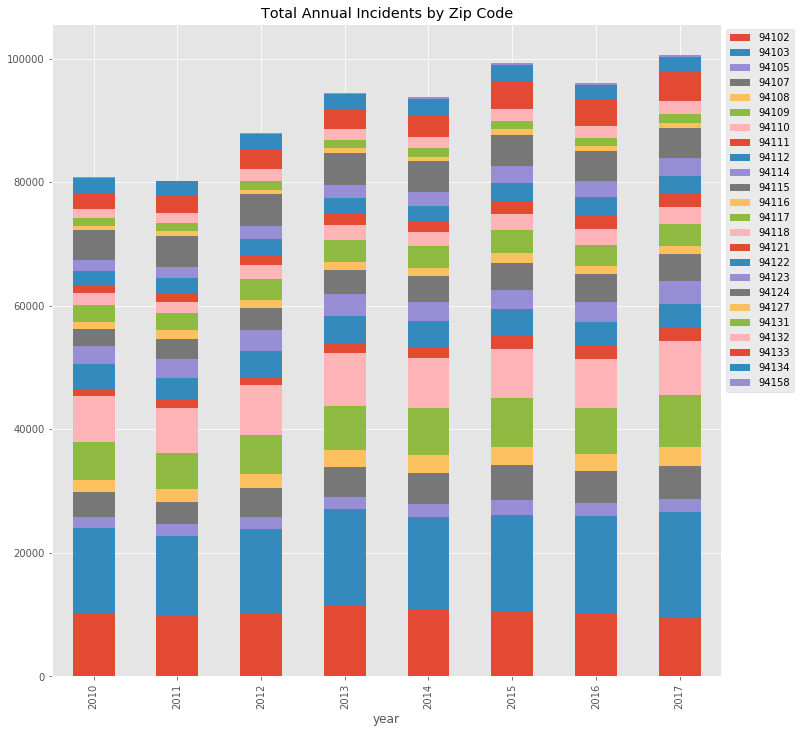

In [46]:
table_zc = group_cat_y.size().unstack()

fig = plt.figure()

table_zc.plot(kind='bar',figsize=(12,12), title='Total Annual Incidents by Zip Code', stacked= True)
fig = plt.gcf()
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.savefig('output/zipcode_totals.png')

plt.show()  